In [ ]:
def fibonacci(n=10):
    """ Generate pairs of fibonacci numbers upto 10 starting with 1,2 ... """

    a, b = 0,1
    for i in range(n):
        c = a + b
        yield (c,b)

In [ ]:
def fourth_series(n=10):
    """ Generate 1, 5, 9 ... upto n elements """

    x = 1
    for i in range(n):
        yield x
        x += 4

def sixth_series(n=10):
    """ Generate 4, 10, 16 ... upto n elements """

    x=4
    for i in range(n):
        yield x
        x += 6

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def golden_rectangles(max_n=10):
    """ Generate and plot successive golden rectangles """

    # List of fibonacci numbers as (fn, fn-1) pair
    fibs = list(fibonacci(max_n))
    # Reverse as we need to generate rectangles
    # from large -> small
    fibs.reverse()

    # Create a sub-plot
    fig, ax = plt.subplots(1)

    last_x, last_y = fibs[0]
    # Make the plot size large enough to hold
    # the largest fibonacci number on both
    # x and y-axis.
    ax.set_xlim(0, last_x + 10)
    ax.set_ylim(0, last_y + 10)
    # Turn off the axes
    plt.axis('off')

    # First rectangle is centered at (0,0)
    origin = [0, 0]

    # Rectangles
    rects = []
    
    for i,(cur_fn, prev_fn) in enumerate(fibs):
        # Plot upto max_n + 1 rectangles
        if i > max_n: break

        if i in fourth_series(max_n):
            # Every 4th rectangle from the 2nd
            # rectangle onwards has its origin-x
            # point shifted by the fibonacci value
            origin[0] = origin[0] + cur_fn

        elif i in sixth_series(max_n):
            # Every 6th rectangle from the 5th
            # rectangle onwards has its origin-y
            # point shifted by the fibonacci value
            origin[1] = origin[1] + cur_fn
            
        if i%2 == 1:
            # Every 2nd rectangle has its orientation
            # switched from lxb to bxl
            cur_fn, prev_fn = prev_fn, cur_fn

        rectangle = Rectangle(origin, cur_fn, prev_fn, angle=0.0, antialiased=True)
        rects.append(rectangle)

    # Add the rectangles to the plot - we need transparency
    # so that the embedded rectangles all show up   
    rect_pcs = PatchCollection(rects, facecolor='g', alpha=0.4,
                               edgecolor='black')

    ax.add_collection(rect_pcs)
    plt.show()

In [ ]:
golden_rectangles(10)

In [ ]:
from matplotlib.patches import Arc
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

In [ ]:
def golden_curve(max_n=10):
    """ Plot the golden curve """

    # List of fibonacci numbers as (fn, fn-1) pair
    fibs = list(fibonacci(max_n))
    # Reverse as we need to generate rectangles
    # from large -> small
    fibs.reverse()

    fig, ax = plt.subplots(1)

    last_x, last_y = fibs[0]

    # Make the plot size large enough to hold
    # the largest fibonacci number on both
    # x and y-axis.
    ax.set_xlim(0, last_x + 10)
    ax.set_ylim(0, last_y + 10) 
    plt.axis('off')

    origin = [0, 0]
    p = 0

    # Data for plotting arcs
    arc_points = []
    rects = []

    # Starting offset angle
    angle = 90

    for i,(cur_fn, prev_fn) in enumerate(fibs):
        if i > max_n: break

        # Current arc's radius
        arc_radius = cur_fn

        if i in fourth_series(max_n):
            # Every 4th rectangle from the 2nd
            # rectangle onwards has its origin-x
            # point shifted by the fibonacci value
            origin[0] = origin[0] + cur_fn

        elif i in sixth_series(max_n):
            # Every 6th rectangle from the 5th
            # rectangle onwards has its origin-y
            # point shifted by the fibonacci value          
            origin[1] = origin[1] + cur_fn
            
        if i%2 == 0:
            # Every 2nd rectangle has its orientation
            # switched from lxb to bxl          
            cur_fn, prev_fn = prev_fn, cur_fn

        rectangle = Rectangle(origin, prev_fn, cur_fn, angle=0.0, antialiased=True)
        rects.append(rectangle)
        if i == 0: continue
        
        if i  % 8 == 0:
            p += 1
            continue

        if len(arc_points) == 8: continue

        r1 = rectangle
        # Calculate the rectangle's co-ordinates
        coords = [r1.get_xy(), [r1.get_x()+r1.get_width(), r1.get_y()],
                  [r1.get_x()+r1.get_width(), r1.get_y()+r1.get_height()],
                  [r1.get_x(), r1.get_y()+r1.get_height()]]

        # Successive arcs are centered on the points of rectangles
        # which is calculated as the p % 4 the item
        arc_points.append((coords[p % 4], arc_radius, angle))
        # Every turn of the spiral we go clockwise by 90 degrees
        # means the starting angle reduces by 90.
        angle -= 90

        # Reset to 0
        if angle == -360: angle = 0
        p += 3
            
    for center, radius, angle in arc_points:
        print('Plotting arc at center',center,'radius',radius, 'angle',angle)
        arc = Arc(center, radius*2, radius*2, angle=angle,
                  theta1=0, theta2=90.0, edgecolor='black',
                  antialiased=True)
        ax.add_patch(arc)
        
    rect_pcs = PatchCollection(rects, facecolor='g', alpha=0.4,
                              edgecolor='black')

    ax.add_collection(rect_pcs)
    
    plt.show()

In [ ]:
golden_curve(5)

[(55, 0), [89, 0], [89, 55], [55, 55]]
[(55, 0), [89, 0], [89, 21], [55, 21]]
[(55, 0), [68, 0], [68, 21], [55, 21]]
[(55, 13), [68, 13], [68, 21], [55, 21]]
[(63, 13), [68, 13], [68, 21], [63, 21]]
[(63, 13), [68, 13], [68, 16], [63, 16]]
[(63, 13), [65, 13], [65, 16], [63, 16]]
[(64, 13), [65, 13], [65, 14], [64, 14]]
Plotting arc at center (55, 0) radius 55 angle 90
Plotting arc at center [55, 21] radius 34 angle 0
Plotting arc at center [68, 21] radius 21 angle -90
Plotting arc at center [68, 13] radius 13 angle -180
Plotting arc at center (63, 13) radius 8 angle -270
Plotting arc at center [63, 16] radius 5 angle 0
Plotting arc at center [65, 16] radius 3 angle -90
Plotting arc at center [65, 14] radius 1 angle -180


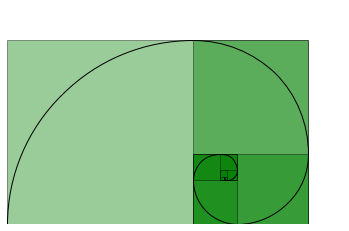

In [1]:

"""
Plot the Golden Spiral/Curve using matplotlib
"""

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arc
from matplotlib.collections import PatchCollection

def fibonacci(n=10):
    """ Generate fibonacci numbers upto 10 starting with 1,2 ... """

    a, b = 0,1
    for i in range(n):
        c = a + b
        yield (c,b)     
        a,b=b,c

def fourth_series(n=10):
    """ Generate 1, 5, 9 ... upto n elements """

    x = 1
    for i in range(n):
        yield x
        x += 4

def sixth_series(n=10):
    """ Generate 4, 10, 16 ... upto n elements """

    x=4
    for i in range(n):
        yield x
        x += 6
    
def golden_curve(max_n=10):
    """ Plot the golden curve """

    # List of fibonacci numbers as (fn, fn-1) pair
    fibs = list(fibonacci(max_n))
    # Reverse as we need to generate rectangles
    # from large -> small
    fibs.reverse()

    fig, ax = plt.subplots(1)

    last_x, last_y = fibs[0]

    # Make the plot size large enough to hold
    # the largest fibonacci number on both
    # x and y-axis.
    ax.set_xlim(0, last_x + 10)
    ax.set_ylim(0, last_y + 10)
    plt.axis('off')

    origin = [0, 0]
    p = 0
    # Data for plotting arcs
    arc_points = []
    rects = []

    # Starting offset angle
    angle = 90

    for i,(cur_fn, prev_fn) in enumerate(fibs):
        if i > max_n: break

        # Current arc's radius
        arc_radius = cur_fn
            
        if i in fourth_series(max_n):
            # Every 4th rectangle from the 2nd
            # rectangle onwards has its origin-x
            # point shifted by the fibonacci value
            origin[0] = origin[0] + cur_fn

        elif i in sixth_series(max_n):
            # Every 6th rectangle from the 5th
            # rectangle onwards has its origin-y
            # point shifted by the fibonacci value          
            origin[1] = origin[1] + cur_fn
            
        if i%2 == 0:
            # Every 2nd rectangle has its orientation
            # switched from lxb to bxl          
            cur_fn, prev_fn = prev_fn, cur_fn

        rectangle = Rectangle(origin, prev_fn, cur_fn, angle=0.0, antialiased=True)
        rects.append(rectangle)
        if i == 0: continue
        
        if i  % 8 == 0:
            p += 1
            continue

        if len(arc_points) == 8: continue
        
        r1 = rectangle
        # Calculate the rectangle's co-ordinates
        coords = [r1.get_xy(), [r1.get_x()+r1.get_width(), r1.get_y()],
                  [r1.get_x()+r1.get_width(), r1.get_y()+r1.get_height()],
                  [r1.get_x(), r1.get_y()+r1.get_height()]]

        print(coords)
        # Successive arcs are centered on the points of rectangles
        # which is calculated as the p % 4 the item
        # Draw upto 7 arcs
        arc_points.append((coords[p % 4], arc_radius, angle))
        # Every turn of the spiral we go clockwise by 90 degrees
        # means the starting angle reduces by 90.
        angle -= 90

        # Reset to 0
        if angle == -360: angle = 0
        p += 3
            
    for center, radius, angle in arc_points:
        print('Plotting arc at center',center,'radius',radius, 'angle',angle)
        arc = Arc(center, radius*2, radius*2, angle=angle, snap=True,
                  theta1=0, theta2=90.0, edgecolor='black',
                  antialiased=True)
        ax.add_patch(arc)
        
    rect_pcs = PatchCollection(rects, facecolor='g', alpha=0.4, edgecolor='black')
    # rect_pcs = PatchCollection(rects, facecolor='beige')    
    ax.add_collection(rect_pcs)
    
    plt.show()

if __name__ == "__main__":
    golden_curve(max_n=10)

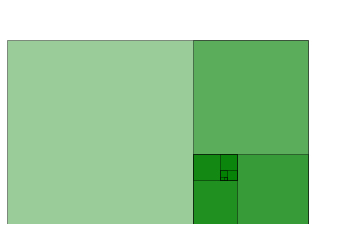

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def fibonacci(n=10):
    """ Generate fibonacci numbers upto 10 starting with 1,2 ... """

    a, b = 0,1
    for i in range(n):
        c = a + b
        yield (c,b)     
        a,b=b,c

def fourth_series(n=10):
    """ Generate 1, 5, 9 ... upto n elements """

    x = 1
    for i in range(n):
        yield x
        x += 4

def sixth_series(n=10):
    """ Generate 4, 10, 16 ... upto n elements """

    x=4
    for i in range(n):
        yield x
        x += 6
        
def golden_rectangles(max_n=10):
    """ Generate and plot successive golden rectangles """

    # List of fibonacci numbers as (fn, fn-1) pair
    fibs = list(fibonacci(max_n))
    # Reverse as we need to generate rectangles
    # from large -> small
    fibs.reverse()

    # Create a sub-plot
    fig, ax = plt.subplots(1)

    last_x, last_y = fibs[0]
    # Make the plot size large enough to hold
    # the largest fibonacci number on both
    # x and y-axis.
    ax.set_xlim(0, last_x + 10)
    ax.set_ylim(0, last_y + 10) 
    # Turn off the axes
    plt.axis('off')

    # First rectangle is centered at (0,0)
    origin = [0, 0]

    # Rectangles
    rects = []
    
    for i,(cur_fn, prev_fn) in enumerate(fibs):
        if i > max_n: break

        if i in fourth_series(max_n):
            # Every 4th rectangle from the 2nd
            # rectangle onwards has its origin-x
            # point shifted by the fibonacci value
            origin[0] = origin[0] + cur_fn

        elif i in sixth_series(max_n):
            # Every 6th rectangle from the 5th
            # rectangle onwards has its origin-y
            # point shifted by the fibonacci value
            origin[1] = origin[1] + cur_fn
            
        if i%2 == 1:
            # Every 2nd rectangle has its orientation
            # switched from lxb to bxl
            cur_fn, prev_fn = prev_fn, cur_fn

        rectangle = Rectangle(origin, cur_fn, prev_fn, angle=0.0, antialiased=True)
        rects.append(rectangle)

    # Add the rectangles to the plot
    rect_pcs = PatchCollection(rects, facecolor='g', alpha=0.4,
                               edgecolor='black')

    ax.add_collection(rect_pcs)
    plt.show()

if __name__ == "__main__":
    golden_rectangles()

0 89 55
1 55 34
2 34 21
3 21 13
4 13 8
5 8 5
6 5 3
7 3 2
8 2 1
9 1 1


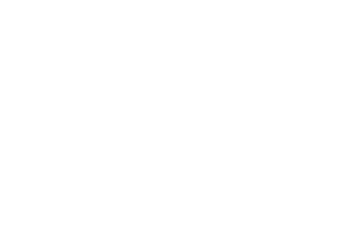

In [9]:
max_n=10
# List of fibonacci numbers as (fn, fn-1) pair
fibs = list(fibonacci(max_n))
# Reverse as we need to generate rectangles
# from large -> small
fibs.reverse()

# Create a sub-plot
fig, ax = plt.subplots(1)

last_x, last_y = fibs[0]
# Make the plot size large enough to hold
# the largest fibonacci number on both
# x and y-axis.
ax.set_xlim(0, last_x + 10)
ax.set_ylim(0, last_y + 10) 
# Turn off the axes
plt.axis('off')

# First rectangle is centered at (0,0)
origin = [0, 0]

# Rectangles
rects = []
for i,(cur_fn, prev_fn) in enumerate(fibs):
        if i > max_n: break
        print(i,cur_fn, prev_fn)

In [10]:
fibs

[(89, 55),
 (55, 34),
 (34, 21),
 (21, 13),
 (13, 8),
 (8, 5),
 (5, 3),
 (3, 2),
 (2, 1),
 (1, 1)]